In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv("test.csv")
orig_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
orig_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()
print ('----------------------------------------------')
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non

In [6]:
titanic_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
orig_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

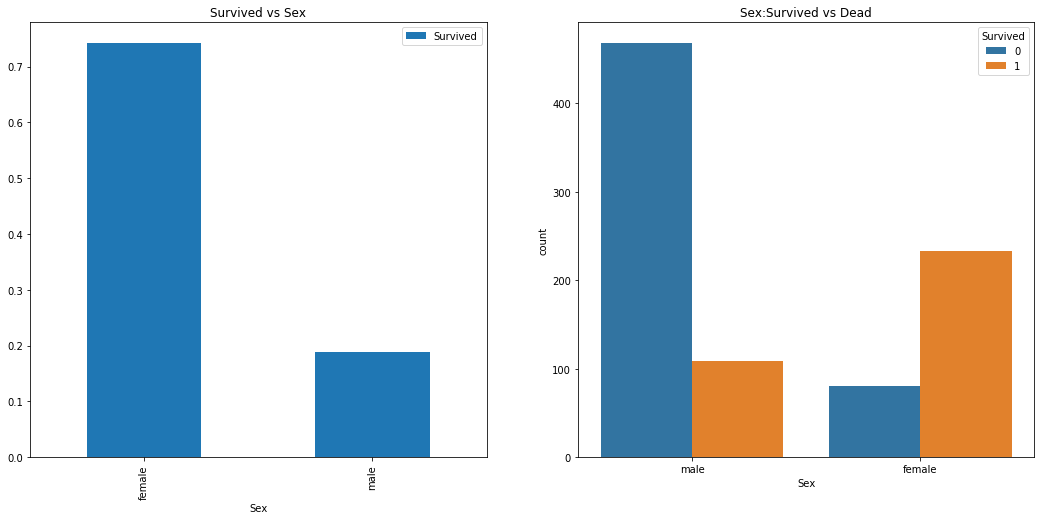

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
orig_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=orig_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

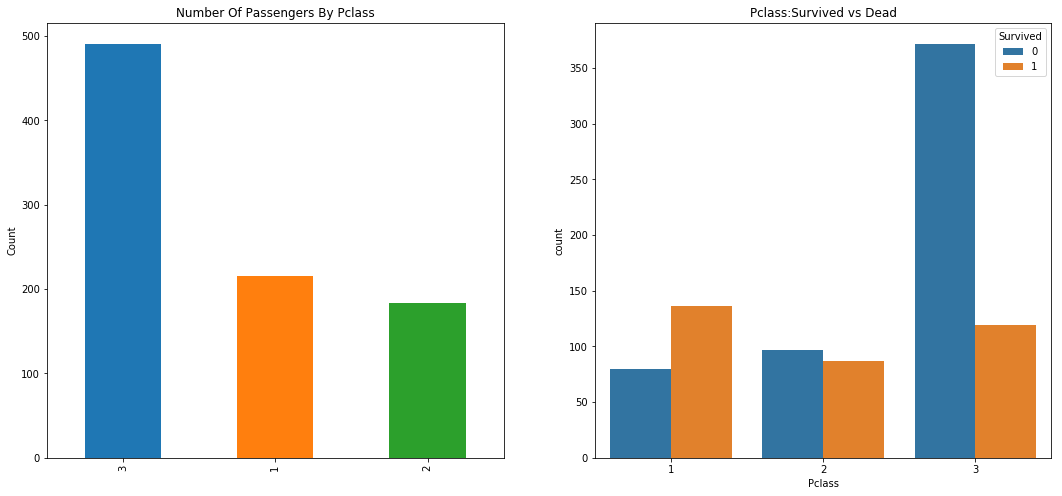

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
orig_df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=orig_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
titanic_df['Initial']=0
for i in titanic_df:
    titanic_df['Initial']=titanic_df.Name.str.extract('([A-Za-z]+)\.')

In [11]:
orig_df['Initial']=0
for i in orig_df:
    orig_df['Initial']=orig_df.Name.str.extract('([A-Za-z]+)\.')

In [12]:
titanic_df['Initial'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Initial, dtype: int64

In [13]:
orig_df['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Countess      1
Sir           1
Lady          1
Ms            1
Mme           1
Don           1
Capt          1
Name: Initial, dtype: int64

In [14]:
titanic_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Dona'],
                              ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [15]:
orig_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                              ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
titanic_df.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.151351
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

In [17]:
orig_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Mr'),'Age']=33
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Mrs'),'Age']=36
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Master'),'Age']=5
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Miss'),'Age']=22
titanic_df.loc[(titanic_df.Age.isnull())&(titanic_df.Initial=='Other'),'Age']=46

In [19]:
titanic_df.Age.isnull().value_counts()

False    418
Name: Age, dtype: int64

In [20]:
orig_df.loc[(orig_df.Age.isnull())&(orig_df.Initial=='Mr'),'Age']=33
orig_df.loc[(orig_df.Age.isnull())&(orig_df.Initial=='Mrs'),'Age']=36
orig_df.loc[(orig_df.Age.isnull())&(orig_df.Initial=='Master'),'Age']=5
orig_df.loc[(orig_df.Age.isnull())&(orig_df.Initial=='Miss'),'Age']=22
orig_df.loc[(orig_df.Age.isnull())&(orig_df.Initial=='Other'),'Age']=46


In [21]:
orig_df.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

In [22]:
titanic_df['Age_band']=0
titanic_df.loc[titanic_df['Age']<=16,'Age_band']=0
titanic_df.loc[(titanic_df['Age']>16)&(titanic_df['Age']<=32),'Age_band']=1
titanic_df.loc[(titanic_df['Age']>32)&(titanic_df['Age']<=48),'Age_band']=2
titanic_df.loc[(titanic_df['Age']>48)&(titanic_df['Age']<=64),'Age_band']=3
titanic_df.loc[titanic_df['Age']>64,'Age_band']=4
titanic_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,3


In [23]:
titanic_df['Age_band'].value_counts()

1    193
2    148
0     38
3     37
4      2
Name: Age_band, dtype: int64

In [24]:
orig_df['Age_band']=0
orig_df.loc[orig_df['Age']<=16,'Age_band']=0
orig_df.loc[(orig_df['Age']>16)&(orig_df['Age']<=32),'Age_band']=1
orig_df.loc[(orig_df['Age']>32)&(orig_df['Age']<=48),'Age_band']=2
orig_df.loc[(orig_df['Age']>48)&(orig_df['Age']<=64),'Age_band']=3
orig_df.loc[orig_df['Age']>64,'Age_band']=4
orig_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [25]:
orig_df['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [26]:
titanic_df.info()
print ('----------------------------------------------')
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Initial        418 non-null object
Age_band       418 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 42.5+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 no

In [27]:
titanic_df.drop(['Name','Age','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
orig_df.drop(['Name','Age','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [28]:
titanic_df['Sex'].replace(['male', 'female'], ['0', '1'],inplace=True)
titanic_df['Initial'].replace(['Mr','Mrs','Master','Miss','Other'], ['0','1','2','3','4'],inplace=True)

In [29]:
orig_df['Sex'].replace(['male', 'female'], ['0', '1'],inplace=True)
orig_df['Initial'].replace(['Mr','Mrs','Master','Miss','Other'], ['0','1','2','3','4'],inplace=True)

In [30]:
titanic_df.head(3)

,PassengerId,Pclass,Sex,SibSp,Parch,Initial,Age_band
0,892,3,0,0,0,0,2
1,893,3,1,1,0,1,2
2,894,2,0,0,0,0,3


In [31]:
orig_df.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Initial,Age_band
0,1,0,3,0,1,0,0,1
1,2,1,1,1,1,0,1,2
2,3,1,3,1,0,0,3,1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


C:\Users\indra\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [33]:
Y_train = orig_df["Survived"]
X_train = orig_df.iloc[:,2:]
X_test  = titanic_df.iloc[:,1:]
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.8540965207631874

In [36]:
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.41

In [38]:
submission = pd.DataFrame({ "PassengerId": titanic_df["PassengerId"],
                            "Survived": Y_pred })
submission.to_csv('submission.csv', index=False)